# 1.DATA CLEANING- DATA WRANGLING

In [803]:
#Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
%matplotlib inline

In [804]:
#Loading,reading and storing dataset
df = pd.read_csv('marketing_data.csv')

In [805]:
#Review of data fields
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [806]:
df1 = pd.read_csv('ifood_df.csv')

### Understanding data   
ID=Customer's unique identifier   
Year_Birth=Customer's birth year   
Education=Customer's education level   
Marital_Status=Customer's marital status   
Income=Customer's yearly household income   
Kidhome=Number of children in customer's household   
Teenhome=Number of teenagers in customer's household   
Dt_Customer=Date of customer's enrollment with the company   
Recency=Number of days since customer's last purchase   
MntWines=Amount spent on wine in the last 2 years   
MntFruits=Amount spent on fruits in the last 2 years   
MntMeatProducts=Amount spent on meat in the last 2 years   
MntFishProducts=Amount spent on fish in the last 2 years   
MntSweetProducts=Amount spent on sweets in the last 2 years   
MntGoldProds=Amount spent on gold in the last 2 years   
NumDealsPurchases=Number of purchases made with a discount   
NumWebPurchases=Number of purchases made through the company's web site   
NumCatalogPurchases=Number of purchases made using a catalogue   
NumStorePurchases=Number of purchases made directly in stores   
NumWebVisitsMonth=Number of visits to company's web site in the last month   
AcceptedCmp3=1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4=1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5=1 if customer accepted the offer in the 5th campaign, 0 otherwise   
AcceptedCmp1=1 if customer accepted the offer in the 1st campaign, 0 otherwise   
AcceptedCmp2=1 if customer accepted the offer in the 2nd campaign, 0 otherwise   
Response=1 if customer accepted the offer in the last campaign, 0 otherwise   
Complain=1 if customer complained in the last 2 years, 0 otherwise   
Country=Customer's location   

In [807]:
#Show the DataFrame's shape
df.shape

(2240, 28)

In [808]:
 # Standardize column names
df.columns=[e.lower().replace(' ', '') for e in df.columns]  
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   year_birth           2240 non-null   int64 
 2   education            2240 non-null   object
 3   marital_status       2240 non-null   object
 4   income               2216 non-null   object
 5   kidhome              2240 non-null   int64 
 6   teenhome             2240 non-null   int64 
 7   dt_customer          2240 non-null   object
 8   recency              2240 non-null   int64 
 9   mntwines             2240 non-null   int64 
 10  mntfruits            2240 non-null   int64 
 11  mntmeatproducts      2240 non-null   int64 
 12  mntfishproducts      2240 non-null   int64 
 13  mntsweetproducts     2240 non-null   int64 
 14  mntgoldprods         2240 non-null   int64 
 15  numdealspurchases    2240 non-null   int64 
 16  numweb

We have 18 numerical variables and 10 categorical variables: Education, Marital_Status, AcceptedCmp1-AcceptedCmp5,Response, Country and Complain

In [810]:
#Transformon income to numerical
df['income'] = df['income'].str.replace('$', '')
df['income'] = df['income'].str.replace(',', '').astype('float')

C:\Users\danie\AppData\Local\Temp\ipykernel_9612\1407881261.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('$', '')


In [811]:
#Transformon AcceptedCmp1-5, Respomnse, Complain to object
df['acceptedcmp1'] = df['acceptedcmp1'].astype(str)
df['acceptedcmp2'] = df['acceptedcmp2'].astype(str)
df['acceptedcmp3'] = df['acceptedcmp3'].astype(str)
df['acceptedcmp4'] = df['acceptedcmp3'].astype(str)
df['acceptedcmp5'] = df['acceptedcmp5'].astype(str)
df['response'] = df['response'].astype(str)
df['complain'] = df['complain'].astype(str)

In [812]:
#Checking unique values of dataset
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos de la columna '{column}':")
    print(unique_values)
    print()


Valores únicos de la columna 'id':
[ 1826     1 10476 ...    22   528  4070]

Valores únicos de la columna 'year_birth':
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

Valores únicos de la columna 'education':
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Valores únicos de la columna 'marital_status':
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

Valores únicos de la columna 'income':
[84835. 57091. 67267. ... 46310. 65819. 94871.]

Valores únicos de la columna 'kidhome':
[0 1 2]

Valores únicos de la columna 'teenhome':
[0 1 2]

Valores únicos de la columna 'dt_customer':
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13

In [813]:
#Checking for duplicate rows in the data to remove if any
df.duplicated().sum()

0

In [814]:
##hecking null values, I will remove columns have more than 75%
df.isnull().sum().sort_values(ascending=False)


income                 24
id                      0
numdealspurchases       0
complain                0
response                0
acceptedcmp2            0
acceptedcmp1            0
acceptedcmp5            0
acceptedcmp4            0
acceptedcmp3            0
numwebvisitsmonth       0
numstorepurchases       0
numcatalogpurchases     0
numwebpurchases         0
mntgoldprods            0
year_birth              0
mntsweetproducts        0
mntfishproducts         0
mntmeatproducts         0
mntfruits               0
mntwines                0
recency                 0
dt_customer             0
teenhome                0
kidhome                 0
marital_status          0
education               0
country                 0
dtype: int64

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


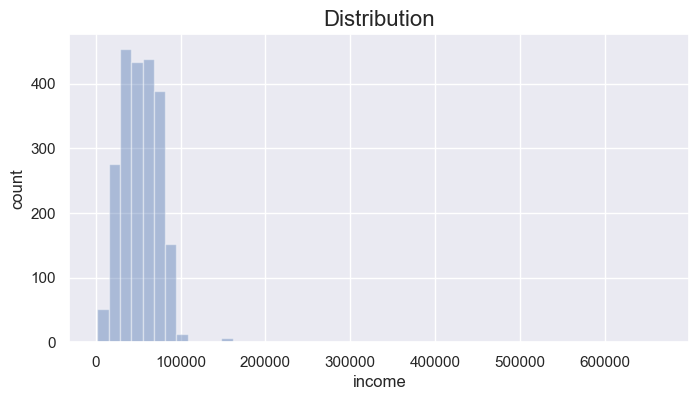

In [815]:
#Plot Income variable to identify best strategy for imputation
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

Findings:

- Plot shows that most incomes are distributed between 0-100.000$ with a few outliers.

Choosing the median as the imputation strategy is a common approach when dealing with skewed distributions or the presence of outliers. The median is robust to outliers because it is not affected by extreme values, unlike the mean. By using the median, the imputed values will be representative of the central tendency of the non-null income values and provide a more accurate estimation compared to the mean. This provides a better approximation of the actual values and helps maintain the integrity and quality of the data.

<AxesSubplot:>

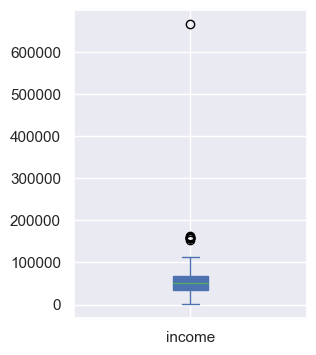

In [816]:
df['income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [817]:
#Impute null values in Income with median value (to avoid skewing of the mean due to outliers):
df['income'] = df['income'].fillna(df['income'].median())

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


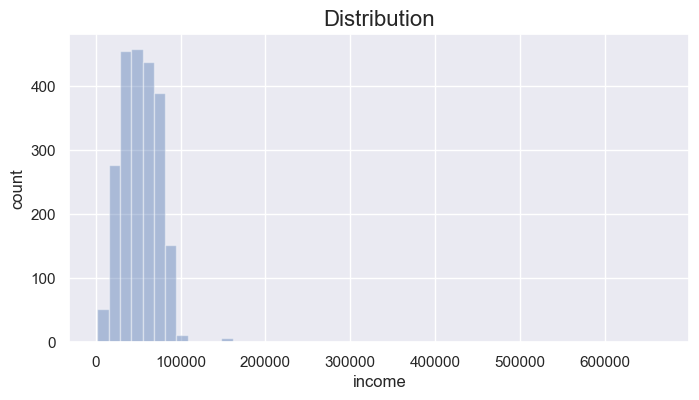

In [818]:
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

## DEALING WITH OUTLIERS

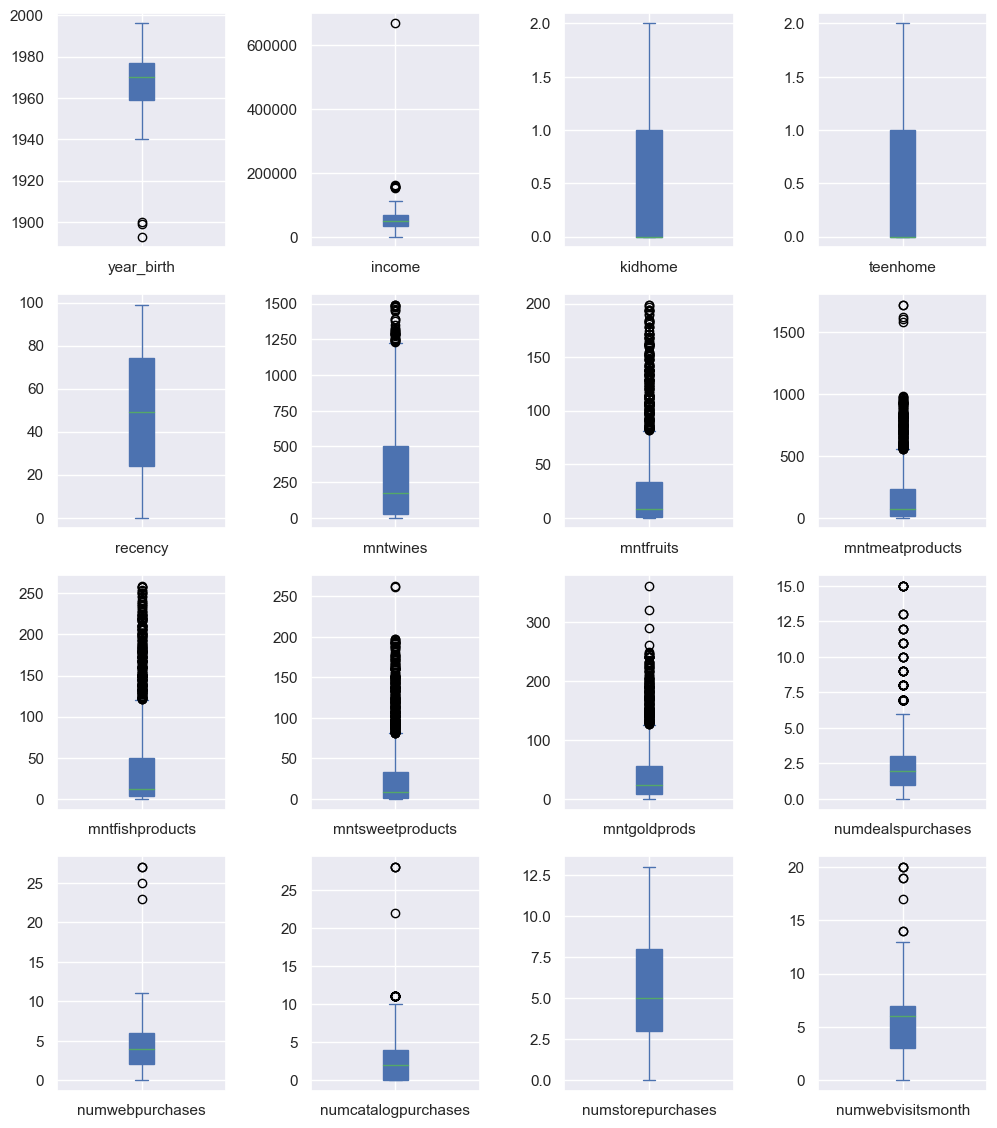

In [819]:
#PLot outliers of numerical data

plt.show()# select columns to plot
df_to_plot = df.drop(columns=['id', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response', 'complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are Year_Birth <= 1900

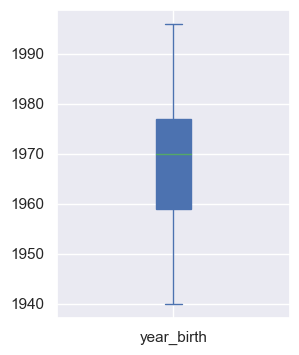

In [820]:
#Remove rows where Year_Birth <= 1900
df = df[df['year_birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['year_birth'].plot(kind='box', patch_artist=True);


## Outliers Income column

We identify Income outliers and then exclude them from the data frame

In [821]:
Q1 = df.income.quantile(0.25)
Q3 = df.income.quantile(0.75)
IQR = Q3 - Q1

income_outliers = df[df.income > Q3 + 1.5*IQR]
df = df[df.income < Q3 + 1.5*IQR]
income_outliers.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US
526,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA
730,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP
851,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP


C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


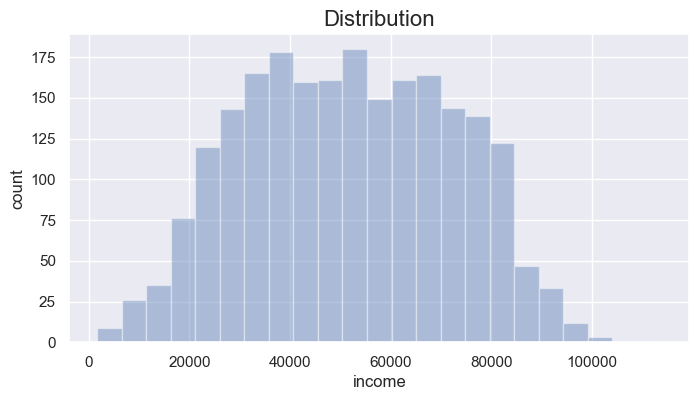

In [822]:
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

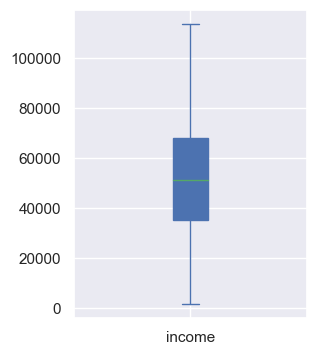

In [823]:
 plt.figure(figsize=(3,4))
df['income'].plot(kind='box', patch_artist=True);

In [824]:
#Counting outliers for each colum

for column in df_to_plot:
    q1 = np.percentile(df_to_plot[column], 25)
    q3 = np.percentile(df_to_plot[column], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    num_outliers = ((df_to_plot[column] < lower_bound) | (df_to_plot[column] > upper_bound)).sum()

    print("Column '{}': {}".format(column, num_outliers))

Column 'year_birth': 3
Column 'income': 8
Column 'kidhome': 0
Column 'teenhome': 0
Column 'recency': 0
Column 'mntwines': 35
Column 'mntfruits': 227
Column 'mntmeatproducts': 175
Column 'mntfishproducts': 223
Column 'mntsweetproducts': 248
Column 'mntgoldprods': 207
Column 'numdealspurchases': 86
Column 'numwebpurchases': 4
Column 'numcatalogpurchases': 23
Column 'numstorepurchases': 0
Column 'numwebvisitsmonth': 8


In [825]:
#Counting percentage of outliers

for column in df_to_plot:
    q1 = np.percentile(df_to_plot[column], 25)
    q3 = np.percentile(df_to_plot[column], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = ((df_to_plot[column] < lower_bound) | (df_to_plot[column] > upper_bound))
    num_outliers = outliers.sum()
    percentage = (num_outliers / len(df_to_plot[column])) * 100

    print("Column '{}': {:.2f}%".format(column, percentage))

Column 'year_birth': 0.13%
Column 'income': 0.36%
Column 'kidhome': 0.00%
Column 'teenhome': 0.00%
Column 'recency': 0.00%
Column 'mntwines': 1.56%
Column 'mntfruits': 10.13%
Column 'mntmeatproducts': 7.81%
Column 'mntfishproducts': 9.96%
Column 'mntsweetproducts': 11.07%
Column 'mntgoldprods': 9.24%
Column 'numdealspurchases': 3.84%
Column 'numwebpurchases': 0.18%
Column 'numcatalogpurchases': 1.03%
Column 'numstorepurchases': 0.00%
Column 'numwebvisitsmonth': 0.36%


We are going to work on the predictions with the rest of the ouliers since once we segment the clients to make the predictions we can lose a lot of data and this could invalidate the model. Once we get the first results we can test the model without outliers.

In [826]:
#Transform yaer_birth and dt_customer into date format
df['year_birth'] = pd.to_datetime(df['year_birth'], format='%Y')
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

In [827]:
#Transform yaer_birth and dt_customer into date format

## Feature engineering

Having a first look at the row data enables us to start thinking at some useful variables we could create in order to better understand our dataset and reveal precious information.

We will create several variables :

- Variable Age in replacement of the variable Year_birth
- Variable Spending as the sum of the amount spent on the product categories
- Variable Marital_Situation to group the different marital status in only 2 comprehensive categories : Couple(Married or Together) vs Alone (Divorced' 'Single', 'Widow' 'YOLO' 'Alone' 'Absurd'
- Variable dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
- The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
- The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
- The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)


We will remove the unused variables for this analysis

In [828]:
counts = df['marital_status'].value_counts()
print(counts)

Married     861
Together    575
Single      479
Divorced    230
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64


In [829]:
#Age
df['age'] = datetime.now().year - df['year_birth'].dt.year

# Spending
mnt_cols = [col for col in df.columns if 'mnt' in col]
df['spending'] = df[mnt_cols].sum(axis=1)

#Marital Status

# Create a mapping dictionary for states

estado_mapeo = {
    'Divorced': 'single',
    'Single': 'single',
    'Married': 'couple',
    'Together': 'couple',
    'Widow':'single',
    'YOLO':'single',
    'Alone':'single',
    'Absurd':'single',
}

# Apply mapping to 'marital_status' column
df['marital_status'] = df['marital_status'].map(estado_mapeo)


# Dependents
df['dependents'] = df['kidhome'] + df['teenhome']

# Year becoming a Customer
df['year_customer'] = pd.DatetimeIndex(df['dt_customer']).year


# Total Purchases
purchases_cols = [col for col in df.columns if 'purchases' in col]
df['total_purchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'cmp' in col] + ['response'] # 'Response' is for the latest campaign
df['total_campaigns_acc'] = df[campaigns_cols].sum(axis=1)


In [830]:
#Drop columns we don´t need
df = df.drop(['year_birth', 'teenhome', 'kidhome','dt_customer'], axis=1)



In [831]:
df.head(3)

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,Graduation,single,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,1190,0,2014,15,1.0
1,1,Graduation,single,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,577,0,2014,18,11.0
2,10476,Graduation,couple,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,251,1,2014,11,0.0


In [832]:
#Saving clean df
df.to_csv('marketing_analysis_clean.csv', index=False)


### Statistical summary 


In [833]:
df.describe()

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,51619.504262,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,2.319874,4.100045,2.636608,5.812472,5.334231,54.111261,605.541050,0.951996,2013.027367,14.869000,8123.388964
std,3244.840538,20601.216248,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,1.895252,2.775461,2.796161,3.242144,2.414981,11.707430,601.032228,0.751976,0.684966,7.622187,28669.066626
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,2012.000000,0.000000,0.000000
25%,2829.000000,35416.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,69.000000,0.000000,2013.000000,8.000000,0.000000
50%,5455.000000,51381.500000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,397.000000,1.000000,2013.000000,15.000000,0.000000
75%,8420.000000,68118.000000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1044.000000,1.000000,2013.000000,21.000000,0.000000
max,11191.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,83.000000,2525.000000,3.000000,2014.000000,43.000000,111111.000000


The describe function generates for us asummary, particularly useful as a first step in our preliminary investigation. Analyzing the statistical summary gives us insightful information in one look :   

-**Average income** is 52.227$ while median income is 51.381$. The distribution is right skewed with the possible presence of outliers   
The maximum value is 666.666$ and the 3rd quartile 68.281$ dollars  so we could deduce that the distribution is skewed to the right with the possible presence of outliers.   
-**Average spending** in the last 2 years is 605$ while median spending is 396$.   
-**Average age** is 54 years old and the oldest customer is 83 years old.   
-**Average store purchases** is the highest with 5.794.397 following by average of web purchases with 4.087.170.   
- The highest average spending on products that have been sold in the last two years has been wine (303.995530), meat(166.916853, gold products(43.968708).   
- The campaign with the highest mean response has been Response, which was the last campaign launched.

# EDA

In [834]:
#Split data into categorical and numerical  for exploration 

In [835]:
df_cat=df.select_dtypes(include=['object'])
df_cat.head(5)

,education,marital_status,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,Graduation,single,0,0,0,0,0,1,0,SP
1,Graduation,single,0,0,0,0,1,1,0,CA
2,Graduation,couple,0,0,0,0,0,0,0,US
3,Graduation,couple,0,0,0,0,0,0,0,AUS
4,Graduation,single,1,1,0,0,0,1,0,SP


In [836]:
#Save numerical data
df_num= df.select_dtypes(exclude=["object"])
df_num.head(3)

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0
2,10476,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,65,251,1,2014,11,0.0


## CUSTOMER PROFILE ANALYSIS

There are columsn relevant for customer profile:
Education:ordinal
Incomo:continuos
Marital:nominal

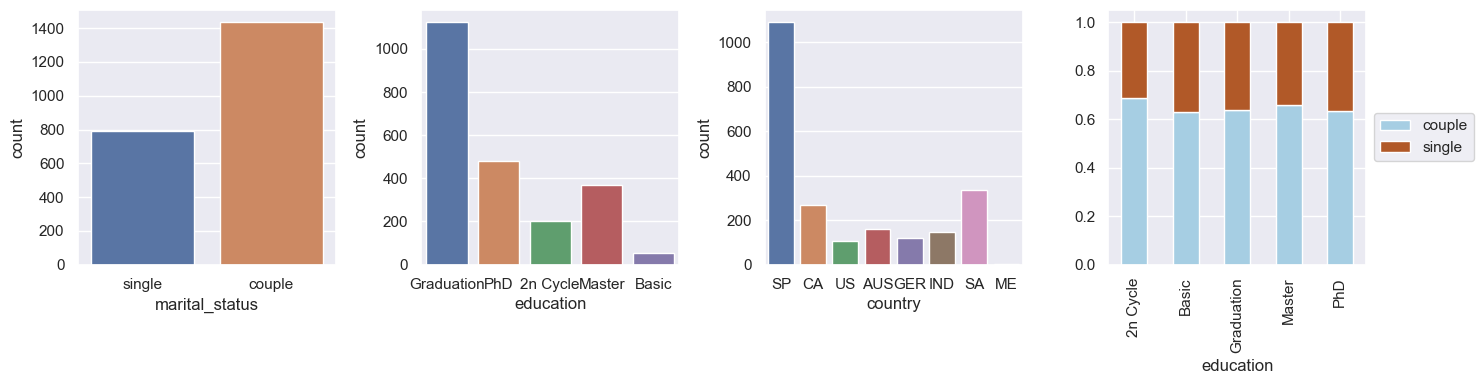

In [837]:
#Displaying categorical data

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

sns.countplot(x=df_cat['marital_status'], ax=ax[0])
sns.countplot(x=df_cat['education'], ax=ax[1])
sns.countplot(x=df_cat['country'], ax=ax[2])


df_plot = df_cat.groupby(['marital_status', 'education']).size().reset_index().pivot(columns='marital_status', index='education', values=0)
df_plot.apply(lambda x: x / x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[3], colormap='Paired')
ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


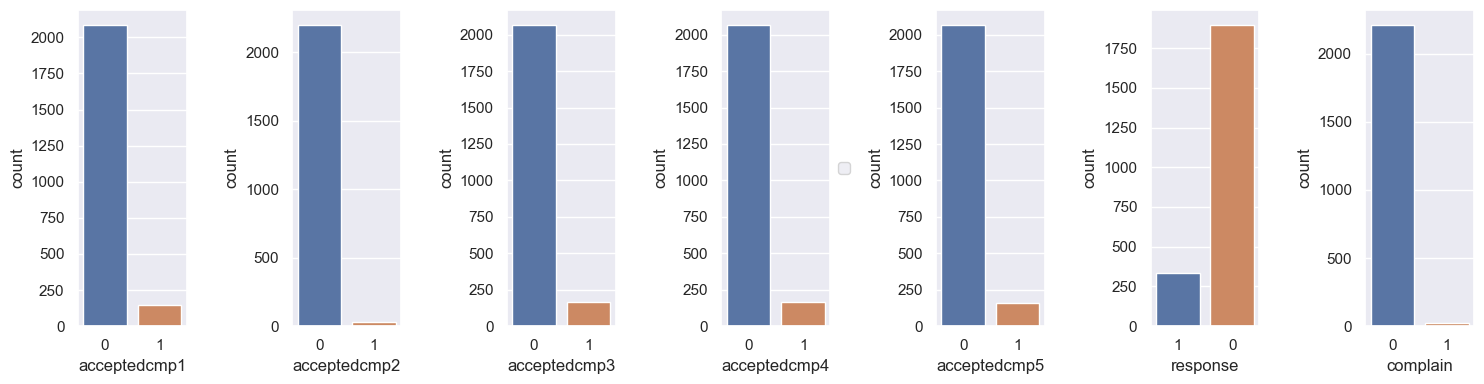

In [838]:
fig, ax = plt.subplots(1, 7, figsize=(15, 4))

sns.countplot(x=df_cat['acceptedcmp1'], ax=ax[0])
sns.countplot(x=df_cat['acceptedcmp2'], ax=ax[1])
sns.countplot(x=df_cat['acceptedcmp3'], ax=ax[2])
sns.countplot(x=df_cat['acceptedcmp4'], ax=ax[3])
sns.countplot(x=df_cat['acceptedcmp5'], ax=ax[4])
sns.countplot(x=df_cat['response'], ax=ax[5])
sns.countplot(x=df_cat['complain'], ax=ax[6])

ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

In [839]:
#Displaying numerical dataç
df_num.columns

Index(['id', 'income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'age', 'spending',
       'dependents', 'year_customer', 'total_purchases',
       'total_campaigns_acc'],
      dtype='object')

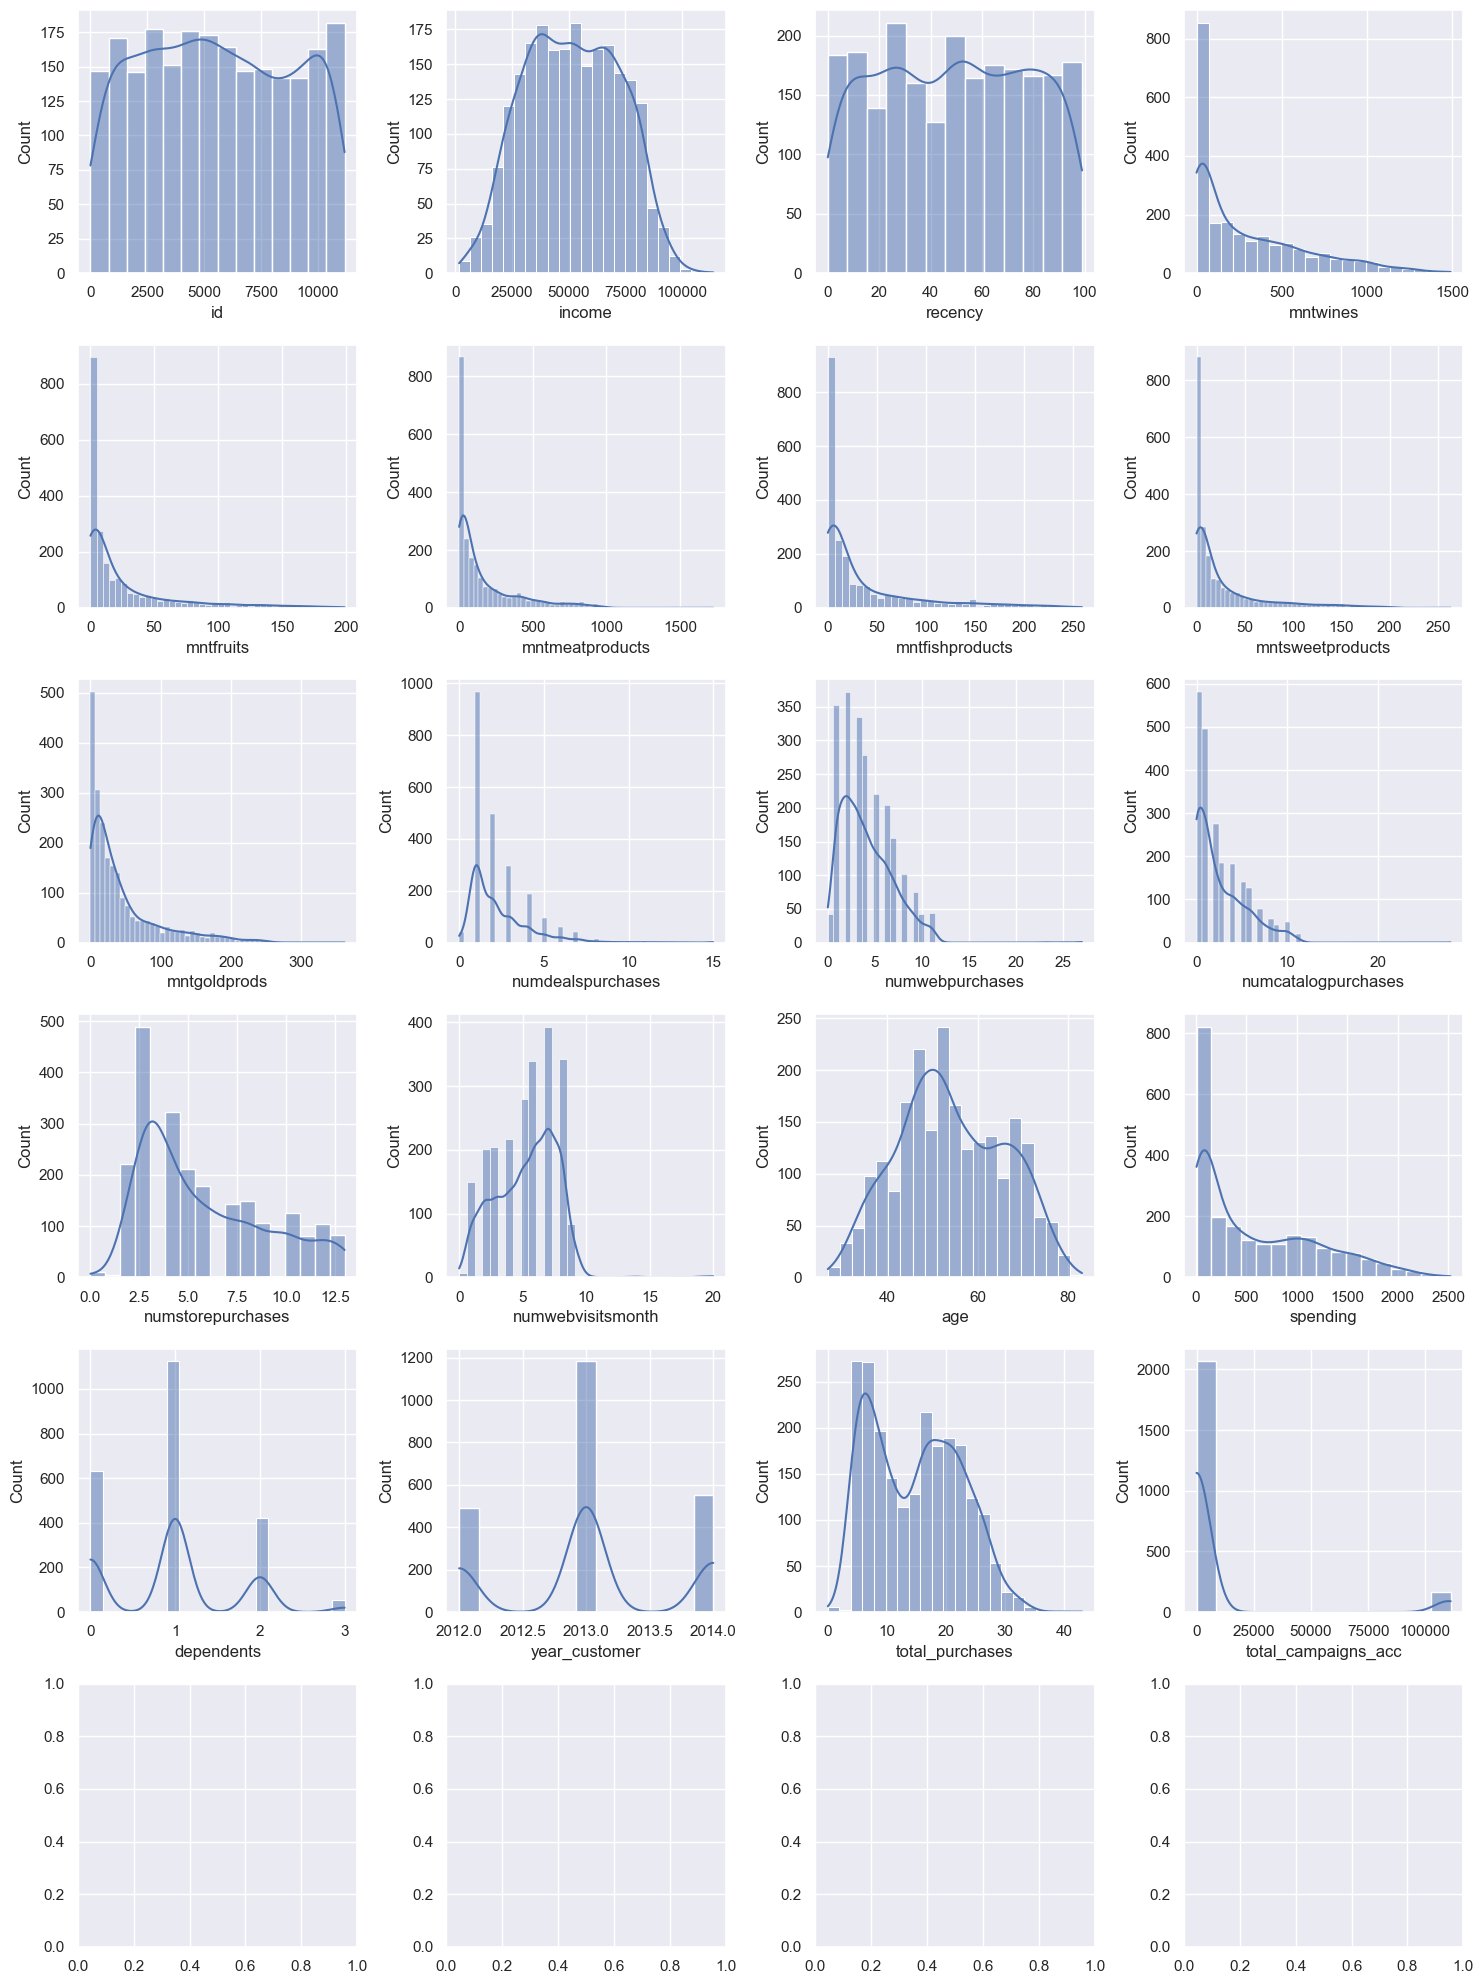

In [840]:
# Crear el lienzo y los ejes
fig, axes = plt.subplots(6, 4, figsize=(15, 20))

# Aplanar el arreglo de ejes para facilitar el acceso
axes = axes.flatten()

# Graficar los histogramas de las columnas numéricas
for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, ax=axes[i], kde=True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Features Correlation Analysis

Text(0.0, 1.0, 'CORRELATIONS HEATMAP FOR NUMERICAL DATA')

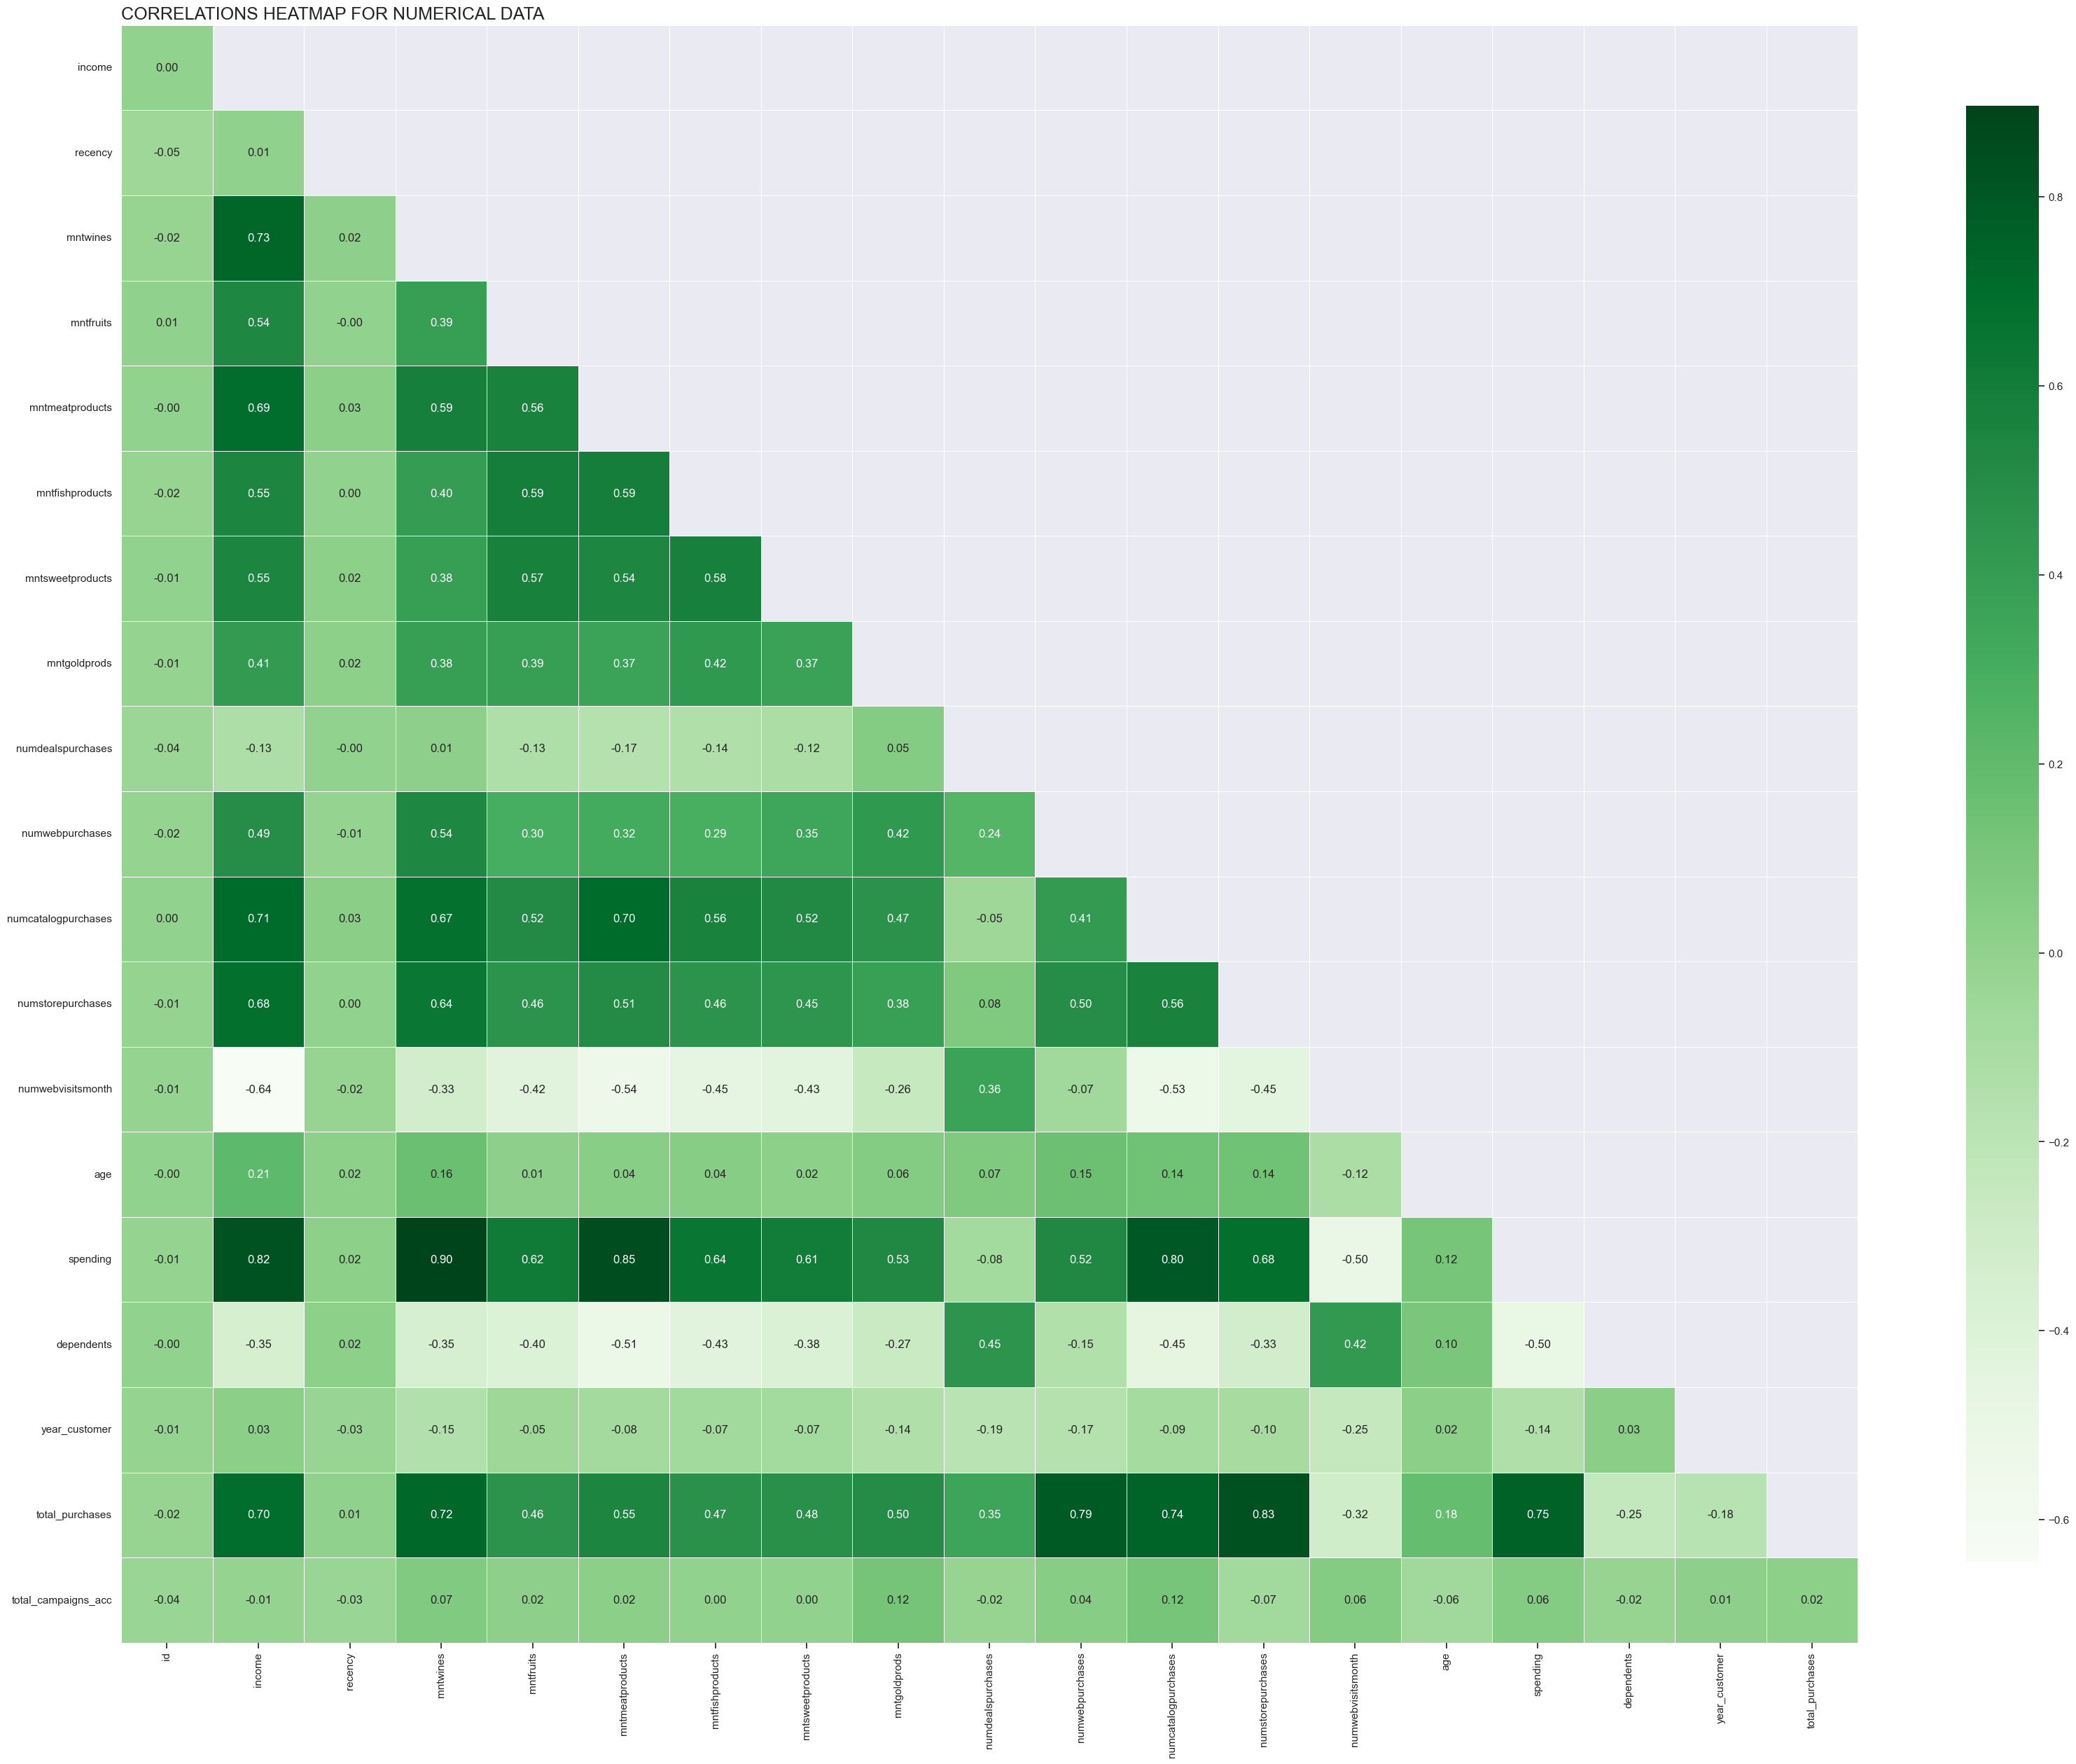

In [841]:
corr = df_num.corr()
ones = np.ones_like(corr, dtype="bool")
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Greens", linewidths=.6, cbar_kws={"shrink":.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for numerical data".upper(), fontdict={"fontsize": 18}, loc="left")

In [842]:
#High correlation:.80 to 1
#Mean correlation:.60 to .80
#Low correlation: .40 to .60

#We see that our target to predict  has mean correlation with total purchases

In [843]:
corr = df_num.corr()
high_corr = corr[corr > 0.80]
high_corr = high_corr.unstack().dropna()
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]

for index, value in high_corr.items():
    variable_1, variable_2 = index
    correlation_value = value
    print("Variables:", variable_1, "and", variable_2)
    print("Correlation:", correlation_value)
    print("------------------------")

Variables: income and spending
Correlation: 0.8202215056408394
------------------------
Variables: mntwines and spending
Correlation: 0.8959193067149777
------------------------
Variables: mntmeatproducts and spending
Correlation: 0.8534350636911707
------------------------
Variables: numstorepurchases and total_purchases
Correlation: 0.8317509633068462
------------------------
Variables: spending and income
Correlation: 0.8202215056408394
------------------------
Variables: spending and mntwines
Correlation: 0.8959193067149777
------------------------
Variables: spending and mntmeatproducts
Correlation: 0.8534350636911707
------------------------
Variables: total_purchases and numstorepurchases
Correlation: 0.8317509633068462
------------------------


## Correlation Results

- Income is a proxy for several other features, such as spending capacity or total purchases. It shows a positive relationship with expenses on meat and wine, indicating that individuals with higher income tend to spend more on these items. On the other hand, income has a negative correlation with the number of children at home and the frequency of website visits, suggesting that individuals with higher income tend to have fewer children at home and visit websites less frequently.   

- Furthermore, the amount spent on wine is not only influenced by high income but also by the amount spent on meat. These two variables are interconnected, meaning that individuals who spend more on meat are also likely to spend more on wine. Moreover, individuals can purchase wine either from catalogs or from physical stores.   

- The number of children at home is negatively associated with spending and income, and consequently, wine consumption. This implies that individuals with more children tend to have lower income and spend less overall, including on wine. Conversely, higher income levels are also linked to a greater willingness to accept advertising campaigns.   

- In summary, income serves as a proxy for several factors, with positive correlations to spending,  meat and wine expenses, while showing negative associations with the number of children at home and website visits. The relationship between income, spending habits, and preferences for specific products such as wine can provide insights into consumer behavior and marketing strategies.   

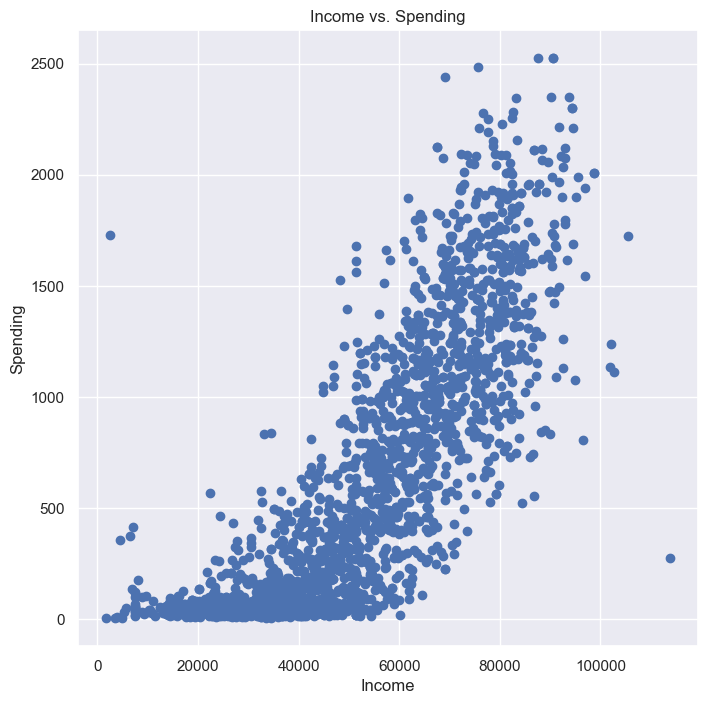

In [844]:
#Plot illustrating the effect of income on spending
plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['spending'])
plt.title('Income vs. Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

<AxesSubplot:xlabel='dependents', ylabel='spending'>

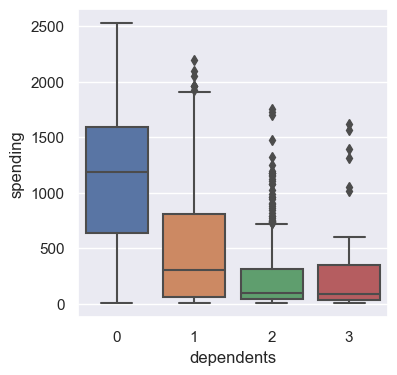

In [845]:
#Plot illustrating negative effect of having dependents (kids & teens) on spending
plt.figure(figsize=(4,4))
sns.boxplot(x='dependents', y='spending', data=df)

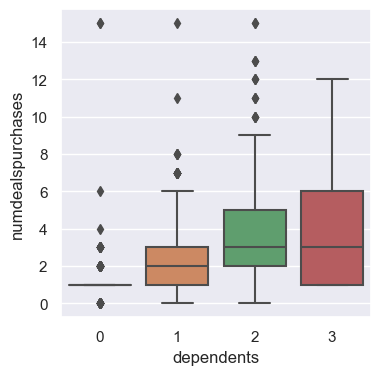

In [846]:
#Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased
plt.figure(figsize=(4,4))
sns.boxplot(x='dependents', y='numdealspurchases', data=df);

In [847]:
#REMOVING SPENDING AND TOTAL PURCHASE to check Multicolinearity

In [848]:
corr_de = df_num.drop(['spending', 'total_purchases'], axis=1)

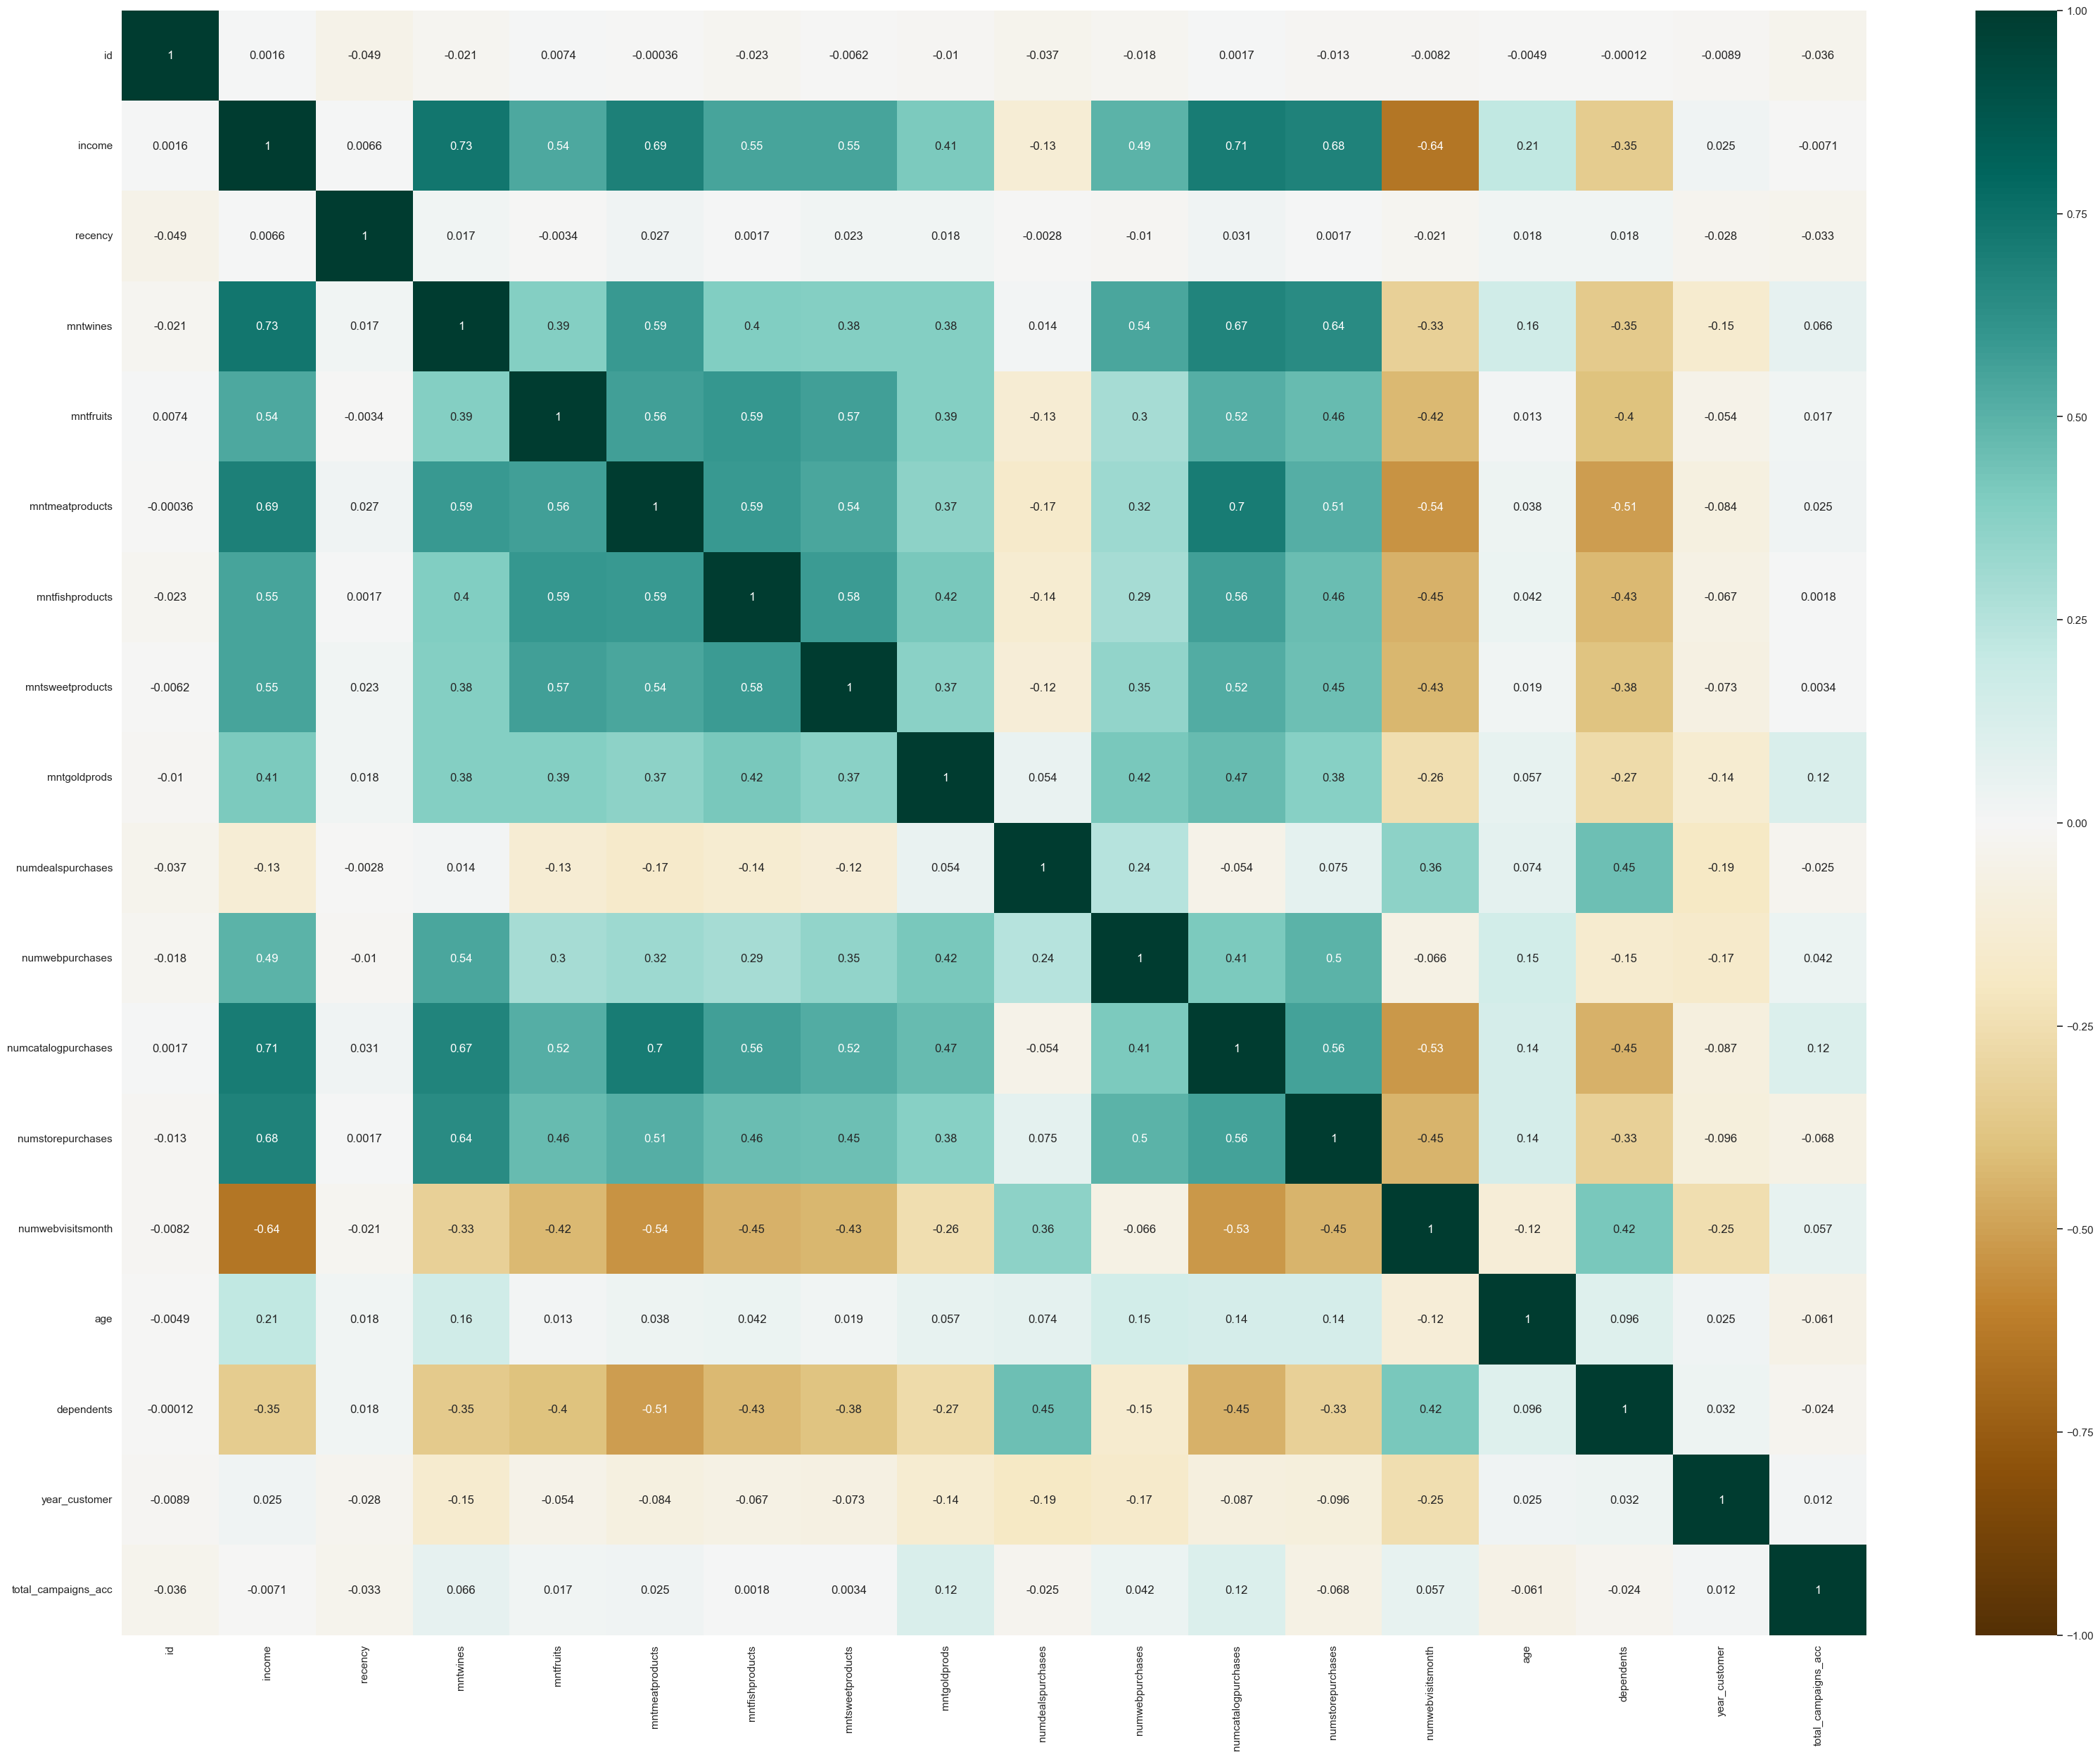

In [849]:
fig, ax = plt.subplots(figsize=(40,30)  )
heatmap = sns.heatmap(corr_de.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Segmentation of Customers

### Choosing columsn for segmentation

I  choose the education and marital status columns of the categorical variables because they provide interesting information for the segmentation. Once they have been encoded, we concatenate it with the scaled numeric variables

In [850]:
df_cat

,education,marital_status,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,Graduation,single,0,0,0,0,0,1,0,SP
1,Graduation,single,0,0,0,0,1,1,0,CA
2,Graduation,couple,0,0,0,0,0,0,0,US
3,Graduation,couple,0,0,0,0,0,0,0,AUS
4,Graduation,single,1,1,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...
2232,PhD,single,0,0,0,0,0,0,0,US
2233,2n Cycle,couple,0,0,0,0,0,0,0,SP
2234,Graduation,single,0,0,0,0,0,0,0,SP
2235,Graduation,couple,0,0,0,0,0,0,0,IND


In [851]:
df_cat_clust_enco= pd.get_dummies(df_cat, drop_first= True)
df_cat_clust_enco

,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_single,acceptedcmp3_1,acceptedcmp4_1,acceptedcmp5_1,acceptedcmp1_1,acceptedcmp2_1,response_1,complain_1,country_CA,country_GER,country_IND,country_ME,country_SA,country_SP,country_US
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2234,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2235,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [852]:
lista_cat= df_cat_clust_enco.columns

In [853]:
df_num.head(2)

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0


In [870]:
cluster = df_num.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

#income
#recency, mntwines	mntfruits	mntmeatproducts	mntfishproducts	mntsweetproducts	mntgoldprods	numdealspurchases	numwebpurchases	numcatalogpurchases	numstorepurchases numwebvisitsmonth	age	spending,total_purchases

In [871]:
cluster

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0
2,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,65,251,1,2014,11,0.0
3,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,56,11,2,2014,4,0.0
4,21474.0,0,6,16,24,11,0,34,2,3,1,2,7,34,91,1,2014,8,110001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,66476.0,99,372,18,126,47,48,78,2,5,2,11,4,47,689,1,2013,20,0.0
2233,31056.0,99,5,10,13,3,8,16,1,1,0,3,8,46,55,1,2013,5,0.0
2234,46310.0,99,185,2,88,15,5,14,2,6,1,5,8,47,309,1,2012,14,0.0
2235,65819.0,99,267,38,701,149,165,63,1,5,4,10,3,45,1383,0,2012,20,0.0


In [872]:
#scaler = StandardScaler()

#cluster_encoded = scaler.fit_transform(cluster)

In [873]:
lista_num= cluster.columns

In [874]:
scaler = MinMaxScaler()
cluster_encod_scaled = scaler.fit_transform(cluster)
cluster_encod_scaled

array([[7.41982429e-01, 0.00000000e+00, 1.26590757e-01, ...,
        1.00000000e+00, 3.48837209e-01, 9.00000900e-06],
       [4.94276990e-01, 0.00000000e+00, 3.10783657e-01, ...,
        1.00000000e+00, 4.18604651e-01, 9.90000990e-05],
       [5.85130888e-01, 0.00000000e+00, 8.97521768e-02, ...,
        1.00000000e+00, 2.55813953e-01, 0.00000000e+00],
       ...,
       [3.98021499e-01, 1.00000000e+00, 1.23911587e-01, ...,
        0.00000000e+00, 3.25581395e-01, 0.00000000e+00],
       [5.72202778e-01, 1.00000000e+00, 1.78834561e-01, ...,
        0.00000000e+00, 4.65116279e-01, 0.00000000e+00],
       [8.31586372e-01, 1.00000000e+00, 1.13194910e-01, ...,
        0.00000000e+00, 4.18604651e-01, 9.00900901e-03]])

In [875]:
#Concatenamos data
cluster_encod_concat = np.concatenate((df_cat_clust_enco, cluster_encod_scaled),axis=1)

In [876]:
cluster_encod_concat 

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 3.48837209e-01, 9.00000900e-06],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.18604651e-01, 9.90000990e-05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.55813953e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.25581395e-01, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.65116279e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.18604651e-01, 9.00900901e-03]])

Choosing the number of clusters
WCSS  ->  Within Clusters Sum of Squares

In [877]:
## finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster_encod_concat)

  wcss.append(kmeans.inertia_)

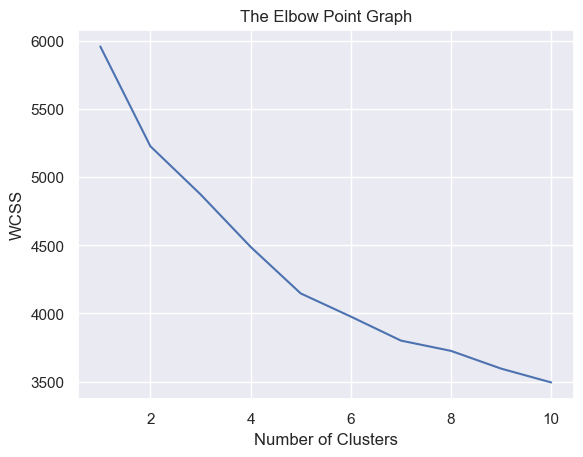

In [878]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 7
Training the k-Means Clustering Model

In [891]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(cluster_encod_concat)

print(Y)

[1 4 4 ... 3 4 2]


In [892]:
klabels= kmeans.labels_

In [893]:
set_klabels = set(klabels)

In [894]:
set_klabels

{0, 1, 2, 3, 4, 5, 6}

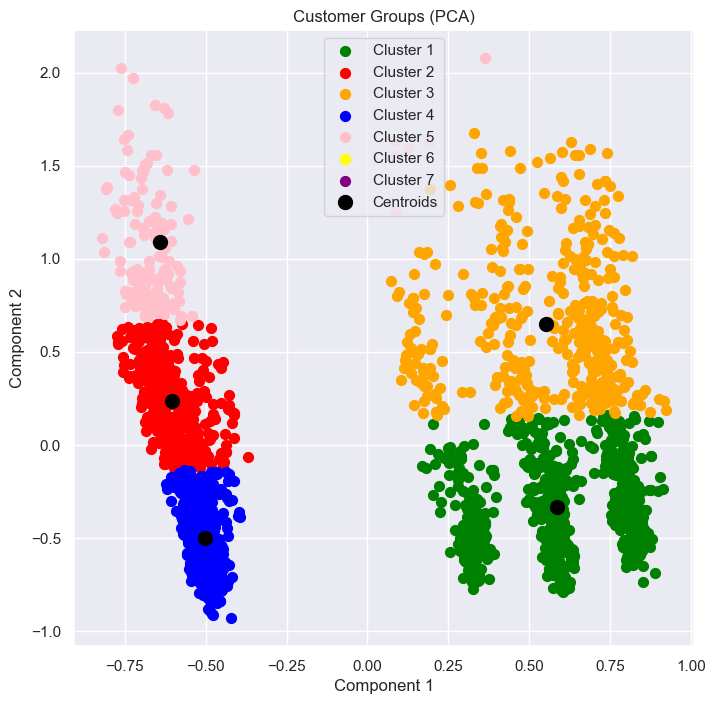

In [895]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_encod_concat)

# Realizar el clustering con K-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(cluster_pca)

# Graficar los clusters en un gráfico de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(cluster_pca[Y == 0, 0], cluster_pca[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(cluster_pca[Y == 1, 0], cluster_pca[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(cluster_pca[Y == 2, 0], cluster_pca[Y == 2, 1], s=50, c='orange', label='Cluster 3')
plt.scatter(cluster_pca[Y == 3, 0], cluster_pca[Y == 3, 1], s=50, c='blue', label='Cluster 4')
plt.scatter(cluster_pca[Y == 4, 0], cluster_pca[Y == 4, 1], s=50, c='pink', label='Cluster 5')
plt.scatter(cluster_pca[Y == 5, 0], cluster_pca[Y == 5, 1], s=50, c='yellow', label='Cluster 6')
plt.scatter(cluster_pca[Y == 6, 0], cluster_pca[Y == 6, 1], s=50, c='purple', label='Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Groups (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [896]:
kmeans.labels_

array([4, 1, 3, ..., 3, 1, 2])

In [897]:
listas=lista_num.append(lista_cat)

In [898]:
len(listas)

38

In [899]:
listas

Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'age', 'spending',
       'dependents', 'year_customer', 'total_purchases', 'total_campaigns_acc',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_status_single', 'acceptedcmp3_1',
       'acceptedcmp4_1', 'acceptedcmp5_1', 'acceptedcmp1_1', 'acceptedcmp2_1',
       'response_1', 'complain_1', 'country_CA', 'country_GER', 'country_IND',
       'country_ME', 'country_SA', 'country_SP', 'country_US'],
      dtype='object')

In [900]:
len(listas)

38

In [901]:
cluster_groups = pd.DataFrame(cluster_encod_concat)
cluster_groups.columns

RangeIndex(start=0, stop=38, step=1)

In [902]:
cols=cluster_groups.columns
def cluster(X):
    feature = X[cols].to_numpy().reshape((-1, 1))
    k_means = KMeans(n_clusters=5).fit(feature)
    X['cluster_id'] = k_means.labels_
    return X

cluster_groups= cluster_groups.apply(cluster)
cluster_groups

C:\Users\danie\AppData\Local\Temp\ipykernel_9612\3243072954.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means = KMeans(n_clusters=5).fit(feature)
C:\Users\danie\AppData\Local\Temp\ipykernel_9612\3243072954.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means = KMeans(n_clusters=5).fit(feature)
C:\Users\danie\AppData\Local\Temp\ipykernel_9612\3243072954.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means = KMeans(n_clusters=5).fit(feature)
C:\Users\danie\AppData\Local\Temp\ipykernel_9612\3243072954.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means = KMeans(n_clusters=5).fit(feature)
C:\Users\danie\AppData\Local\Temp\ipykernel_9612

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.741982,0.0,0.126591,0.522613,0.21971,0.428571,0.718631,0.60221,0.066667,0.148148,0.142857,0.461538,0.05,0.464286,0.470238,0.0,1.0,0.348837,0.000009
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494277,0.0,0.310784,0.025126,0.037101,0.027027,0.0,0.10221,0.066667,0.259259,0.107143,0.538462,0.25,0.625,0.226984,0.0,1.0,0.418605,0.000099
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.585131,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.1,0.678571,0.097619,0.333333,1.0,0.255814,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27449,0.0,0.006698,0.0,0.00058,0.0,0.0,0.0,0.066667,0.037037,0.0,0.153846,0.35,0.517857,0.002381,0.666667,1.0,0.093023,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.176279,0.0,0.004019,0.080402,0.013913,0.042471,0.0,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.125,0.034127,0.333333,1.0,0.186047,0.99001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.26183,1.0,0.003349,0.050251,0.007536,0.011583,0.030418,0.044199,0.066667,0.037037,0.0,0.230769,0.4,0.339286,0.019841,0.333333,0.5,0.116279,0.0
2226,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.398021,1.0,0.123912,0.01005,0.051014,0.057915,0.019011,0.038674,0.133333,0.222222,0.035714,0.384615,0.4,0.357143,0.120635,0.333333,0.0,0.325581,0.0
2227,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.572203,1.0,0.178835,0.190955,0.406377,0.57529,0.627376,0.174033,0.066667,0.185185,0.142857,0.769231,0.15,0.321429,0.546825,0.0,0.0,0.465116,0.0
2228,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831586,1.0,0.113195,0.120603,0.32058,0.725869,0.0,0.39779,0.066667,0.296296,0.178571,0.307692,0.35,0.482143,0.425794,0.666667,0.0,0.418605,0.009009


# Answer the following questions of the CMO:

## What does the Average customer look like for our company?

In [ ]:
selected_columns = ['age', 'year_customer', 'income', 'dependents', 'kidhome', 'teenhome', 'recency']
selected_data = df[selected_columns]
mean_values = selected_data.mean().round(1)
mean_df = pd.DataFrame(mean_values, columns=['Mean'])
mean_df.index.name = 'Variable'
mean_df.columns = ['Average Customer']
mean_df.index = mean_df.index.rename('Characteristics')
mean_df

## What Products are best performing?

Wines Followed by meats

In [ ]:
# Calcular la suma de las ventas de cada producto
sales = df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].sum()

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%')

# Configurar el título
plt.title('Product Performance by Sales')

# Mostrar el gráfico
plt.show()

## Which channels are underperforming?

In [ ]:
# Seleccionar las columnas de interés
channels = df[['numwebvisitsmonth', 'numstorepurchases', 'numcatalogpurchases', 'numwebpurchases', 'numdealspurchases']]

# Calcular la suma de cada canal
channel_purchases = channels.sum()

# Calcular el porcentaje de compras de cada canal
total_purchases = df['total_purchases'].sum()
channel_performance = (channel_purchases / total_purchases) * 100

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(channel_performance, labels=channel_performance.index, autopct='%1.1f%%')

# Configurar el título
plt.title('Channels Performance by Total Purchases')

# Mostrar el gráfico
plt.show()

## Which Marketing Campaigns were most successful?

The most successful campaign is the most recent (column name: Response)

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(15, 4))

sns.countplot(x=df_cat['acceptedcmp1'], ax=ax[0])
sns.countplot(x=df_cat['acceptedcmp2'], ax=ax[1])
sns.countplot(x=df_cat['acceptedcmp3'], ax=ax[2])
sns.countplot(x=df_cat['acceptedcmp4'], ax=ax[3])
sns.countplot(x=df_cat['acceptedcmp5'], ax=ax[4])
sns.countplot(x=df_cat['response'], ax=ax[5])

ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Wh?

In [ ]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_encod_concat)

# Realizar el clustering con K-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(cluster_encod_concat)

# Graficar los clusters en un gráfico de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(cluster_pca[Y == 0, 0], cluster_pca[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(cluster_pca[Y == 1, 0], cluster_pca[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(cluster_pca[Y == 2, 0], cluster_pca[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Groups (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()